In [1]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

In [2]:
#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

In [5]:
max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.299855736830102
=== epoch:1, train acc:0.123, test acc:0.141 ===
train loss:2.297038028496428
train loss:2.2924849410776904
train loss:2.2888870270727795
train loss:2.2781410868783767
train loss:2.2645470040386186
train loss:2.2479880894924658
train loss:2.233550457810495
train loss:2.1980582048062556
train loss:2.226021805980702
train loss:2.1531566686529584
train loss:2.1068859007022045
train loss:2.0622498482583316
train loss:2.0633346496758036
train loss:2.009715839390204
train loss:1.9013166762421962
train loss:1.9165607219190393
train loss:1.7789849086810374
train loss:1.677295912396616
train loss:1.6142354963427072
train loss:1.5096699154446305
train loss:1.5151228748233343
train loss:1.4448525808917763
train loss:1.2853482810130001
train loss:1.2122860041908612
train loss:1.096644123041051
train loss:1.2070363551436467
train loss:1.1835292049460837
train loss:1.0458491989847376
train loss:0.9632056353130983
train loss:0.9834428918495631
train loss:0.912590386790689

train loss:0.30899100320909034
train loss:0.17624581481253826
train loss:0.10633960477170909
train loss:0.2725611296986012
train loss:0.17292860902569157
train loss:0.19684684621973914
train loss:0.219841354385138
train loss:0.2586668459837135
train loss:0.14912073881371601
train loss:0.18200281256053763
train loss:0.1865711109081769
train loss:0.14832571540944262
train loss:0.2170008287417186
train loss:0.23595178026436214
train loss:0.18309100355010932
train loss:0.11486768841373873
train loss:0.21238677518662955
train loss:0.20876550925162923
train loss:0.17137433727504015
train loss:0.1808128055509513
train loss:0.20284721939008968
train loss:0.149553914004652
train loss:0.1752619319951922
train loss:0.07772432782233124
train loss:0.13386793946320974
train loss:0.1521283120616418
train loss:0.1602691924838912
train loss:0.1757419210549897
train loss:0.13127427364700023
train loss:0.1522723348080762
train loss:0.11347140969413663
train loss:0.1293163999186188
train loss:0.2069234321

train loss:0.13211012642196202
train loss:0.09146995331320994
train loss:0.055986256236100054
train loss:0.0836003892702771
train loss:0.09887340894675618
train loss:0.10979541717739474
train loss:0.10167388653472761
train loss:0.10036008322635913
train loss:0.11723899306160958
train loss:0.06173546517154786
train loss:0.07492856178528315
train loss:0.049612584379668485
train loss:0.08785933754979369
train loss:0.027768187343866216
train loss:0.11561212211887088
train loss:0.06540259124073007
train loss:0.1079662632427932
train loss:0.09159968489952053
train loss:0.04278697806757716
train loss:0.05312710612904778
train loss:0.06627679196758968
train loss:0.11254417148056907
train loss:0.08121935536494236
train loss:0.04062317035338633
train loss:0.1659635000300755
train loss:0.08798812834774385
train loss:0.13683242956013456
train loss:0.058010535337185386
train loss:0.03248811843362299
train loss:0.11104235249239755
train loss:0.05020940830118631
train loss:0.15358420731509503
=== epo

train loss:0.048105283354553004
train loss:0.06524515309671243
train loss:0.03186744300312961
train loss:0.0186486021049591
train loss:0.04720758530296946
train loss:0.0389058493624036
train loss:0.040778373345629504
train loss:0.060703965752932236
train loss:0.04326132173762675
train loss:0.07567003534137436
train loss:0.03170807929592922
train loss:0.024541427466845116
train loss:0.018648235473700033
train loss:0.05585635243444839
train loss:0.01572301589827211
train loss:0.022384956278460915
train loss:0.019160456634663516
train loss:0.03902796863218932
train loss:0.02240679044663645
train loss:0.056353009234308714
train loss:0.041396587528238375
train loss:0.03206835046675038
train loss:0.04506883864378084
train loss:0.028763693507947097
train loss:0.03457721831754987
train loss:0.030210397945367486
train loss:0.024011260804382144
=== epoch:17, train acc:0.982, test acc:0.951 ===
train loss:0.0448586439626553
train loss:0.009991643753578382
train loss:0.025196449750313734
train los

In [6]:
# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

Saved Network Parameters!


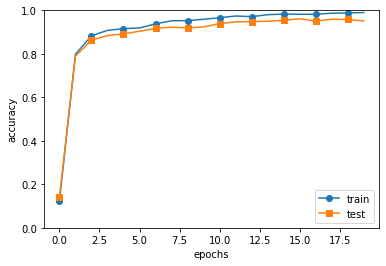

In [7]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()